In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
len(os.listdir("COVID/images/"))

3616

In [3]:
len(os.listdir('NORMAL/images/'))

10192

In [4]:
img = cv2.imread('NORMAL/images/Normal-1000.png')

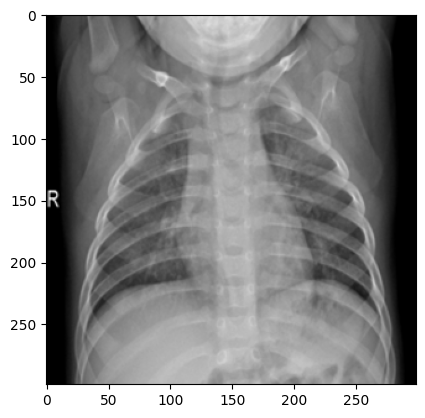

In [5]:
plt.imshow(img)

In [6]:
img.shape

(299, 299, 3)

In [7]:
urls = os.listdir('COVID/images/')
path = "COVID/images/"

In [8]:
def loadImages(path, urls,target ):
  images = []
  labels = []
  #for i in range(len(urls))
  for i in range(len(urls)):
    img_path = path + urls[i]
    img = cv2.imread(img_path)
    img = img / 255.0
    # if we want to resize the images
    img = cv2.resize(img, (100, 100))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [9]:
covid_path = "COVID/images/"
covidUrl = os.listdir(covid_path)
covidImages, covidTargets = loadImages(covid_path, covidUrl, 1)

In [10]:
len(covidUrl), len(covidImages)


(3616, 3616)

In [11]:
normal_path = "Normal/images/"
normal_urls = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normal_urls, 0)

In [12]:
len(normalImages),len(normalTargets)

(10192, 10192)

In [13]:
covidImages.shape,normalImages.shape

((3616, 100, 100, 3), (10192, 100, 100, 3))

In [14]:
covidImages=np.asarray(covidImages)

normalImages=np.asarray(normalImages)

In [15]:
data = np.r_[covidImages,normalImages]
data

array([[[[5.66160784e-02, 5.66160784e-02, 5.66160784e-02],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
         [3.23600980e-02, 3.23600980e-02, 3.23600980e-02]],

        [[7.78431373e-05, 7.78431373e-05, 7.78431373e-05],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
         [6.26066667e-02, 6.26066667e-02, 6.26066667e-02]],

        [[3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [3.82352941e-03, 3.82352941e-03, 3.82352941e-03],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [

In [16]:
targets = np.r_[covidTargets,normalTargets]

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.25)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [19]:
model = Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    #Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [20]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])


In [21]:
model.fit(x_train, y_train,batch_size=32,epochs=5,validation_data=(x_test, y_test))


Epoch 1/5
324/324 [==============================] - 83s 249ms/step - loss: 0.4165 - accuracy: 0.8035 - val_loss: 0.3037 - val_accuracy: 0.8705
Epoch 2/5
324/324 [==============================] - 92s 284ms/step - loss: 0.2998 - accuracy: 0.8688 - val_loss: 0.2626 - val_accuracy: 0.8844
Epoch 3/5
324/324 [==============================] - 80s 247ms/step - loss: 0.2545 - accuracy: 0.8929 - val_loss: 0.2805 - val_accuracy: 0.8743
Epoch 4/5
324/324 [==============================] - 74s 229ms/step - loss: 0.2144 - accuracy: 0.9113 - val_loss: 0.2886 - val_accuracy: 0.8685
Epoch 5/5
324/324 [==============================] - 62s 193ms/step - loss: 0.1891 - accuracy: 0.9237 - val_loss: 0.1875 - val_accuracy: 0.9258


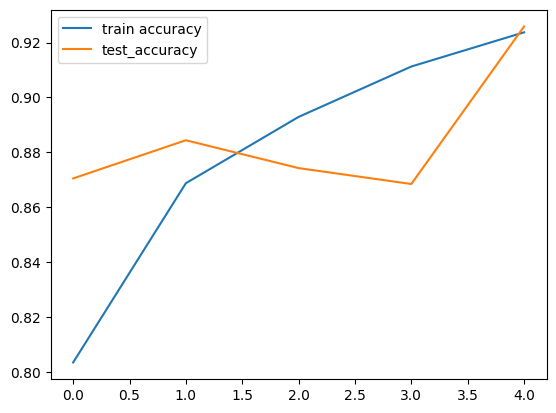

In [22]:
plt.plot(model.history.history['accuracy'], label = 'train accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()


In [23]:
model.input_shape

(None, 100, 100, 3)

In [31]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("coronamodel.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\priya\AppData\Local\Temp\tmppk_5dyp3\assets


INFO:tensorflow:Assets written to: C:\Users\priya\AppData\Local\Temp\tmppk_5dyp3\assets


In [40]:
img1 = cv2.imread('NORMAL/images/Normal-14.png')
img1 = img1 / 255.0
img1 = cv2.resize(img1, (100, 100))
imgtest = np.asarray(img1)


(100, 100, 3)